# Problem Statement

In [ ]:
As Data Science team of LoanTap, we are trying to build an underwriting layer to determine the creditworthiness of MSMEs as well as individuals.
Analyzing this dataset can provide crucial insights into the financial behaviors,spending habits, and potential risk associated with each borrower.
Our ultimate objective is to build a logistic regression model, evaluate its performance, and provide actionableinsights for the underwriting process.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings("ignore")
import re
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_curve,accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import classification_report
import statsmodels.api as sm
from sklearn.pipeline import make_pipeline
from sklearn.metrics import recall_score,precision_score,f1_score

In [2]:
data=pd.read_csv("loantap_datset.csv")

In [3]:
print("The total number rows in the dataset is : ",data.shape[0])
print("The total number columns in the dataset is : ",data.shape[1])

The total number rows in the dataset is :  396030
The total number columns in the dataset is :  27


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
loan_amnt,396030.0,14113.888089,8357.441341,500.00,8000.00,12000.00,20000.00,40000.00
int_rate,396030.0,13.639400,4.472157,5.32,10.49,13.33,16.49,30.99
installment,396030.0,431.849698,250.727790,16.08,250.33,375.43,567.30,1533.81
annual_inc,396030.0,74203.175798,61637.621158,0.00,45000.00,64000.00,90000.00,8706582.00
dti,396030.0,17.379514,18.019092,0.00,11.28,16.91,22.98,9999.00
open_acc,396030.0,11.311153,5.137649,0.00,8.00,10.00,14.00,90.00
pub_rec,396030.0,0.178191,0.530671,0.00,0.00,0.00,0.00,86.00
revol_bal,396030.0,15844.539853,20591.836109,0.00,6025.00,11181.00,19620.00,1743266.00
revol_util,395754.0,53.791749,24.452193,0.00,35.80,54.80,72.90,892.30
total_acc,396030.0,25.414744,11.886991,2.00,17.00,24.00,32.00,151.00


In [6]:
data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [7]:
round(data['loan_status'].value_counts(normalize=True)*100,3)

loan_status
Fully Paid     80.387
Charged Off    19.613
Name: proportion, dtype: float64

##### Data Visualization

In [8]:
data.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [9]:
data.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

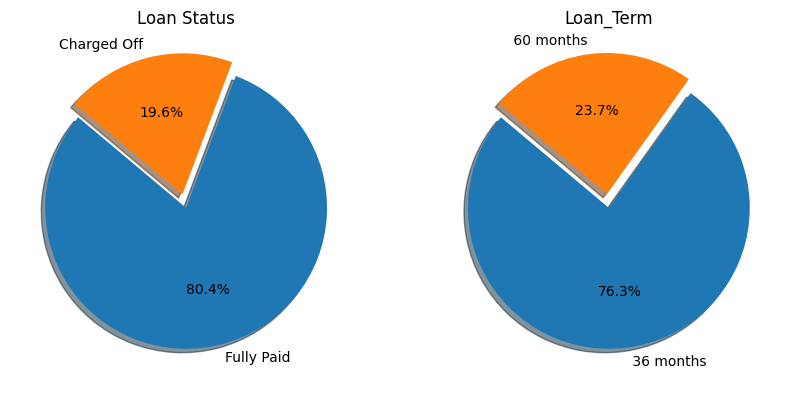

In [10]:
plt.figure(figsize=(10,8))
plt.subplot(1, 2, 1)
loan_status_data=data['loan_status'].value_counts()
plt.pie(loan_status_data, labels=loan_status_data.index, autopct='%1.1f%%', startangle=140,explode=(0,0.1),shadow=True)
plt.title("Loan Status")

plt.subplot(1, 2, 2)
Term_data=data['term'].value_counts()
plt.pie(Term_data, labels=Term_data.index, autopct='%1.1f%%', startangle=140,explode=(0,0.1),shadow=True)
plt.title("Loan_Term")
plt.show()

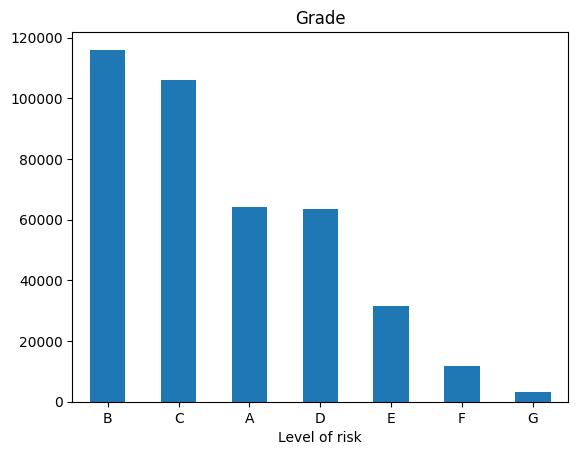

In [11]:
plt.title("Grade")
data['grade'].value_counts().plot(kind='bar')
plt.xlabel("Level of risk")
plt.xticks(rotation=0)
plt.show()

In [13]:
object_cols = data.select_dtypes(include=['object']).columns
numerical_cols = data.select_dtypes(exclude=['object']).columns

In [14]:
numerical_cols

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies'],
      dtype='object')

In [15]:
# fig,ax=plt.subplots(nrows=6,ncols=2)
# for col in numerical_cols:
#     i=0
#     for j in range(2):
#         sns.histplot(data[col]/data[col].max(), kde=True, bins=50,ax=ax[i,j])
#     i+=1
# plt.show()

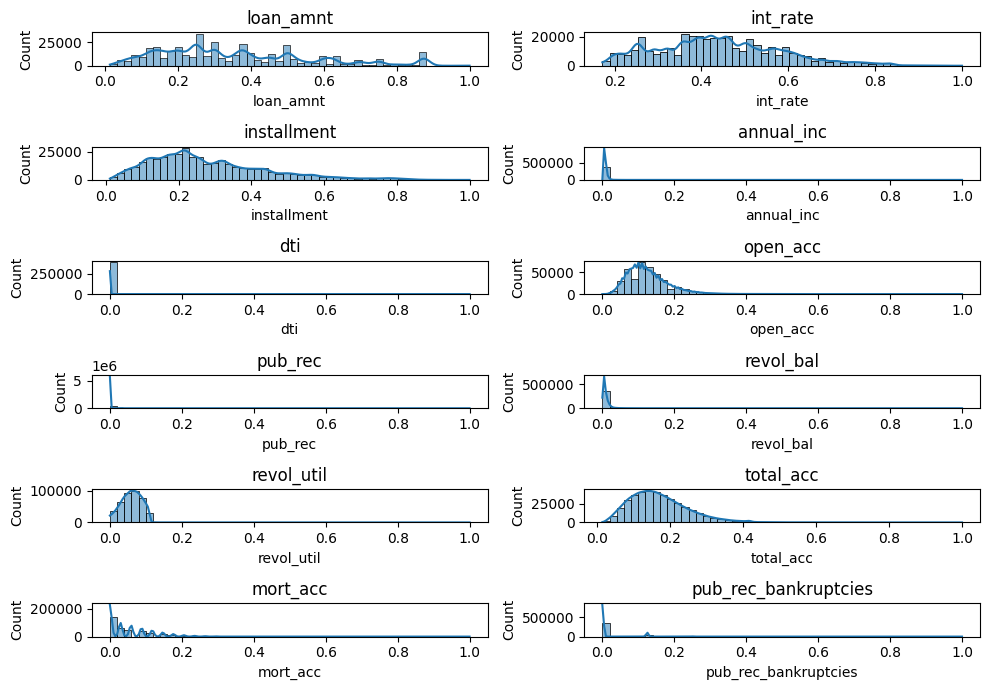

In [16]:
plt.figure(figsize=(10,7))
total_plots = len(numerical_cols)
num_rows = (total_plots + 1) // 2 
for i, col in enumerate(numerical_cols):
    plt.subplot(num_rows,2,i+1)
    sns.histplot(data[col]/data[col].max(), kde=True, bins=50)
    plt.title(col) 
    plt.tight_layout()

plt.show()

In [17]:
# Presence of outliers can be seen since the graphs are right skewed

In [18]:
data.head(2)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"


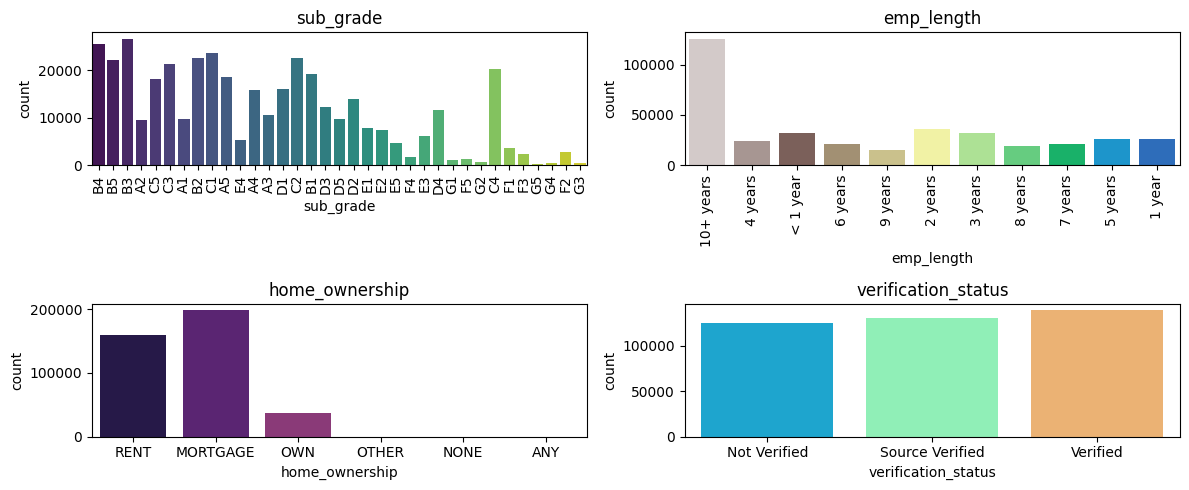

In [19]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.countplot(data=data,x='sub_grade',palette='viridis')
plt.xticks(rotation=90)
plt.title('sub_grade')
plt.subplot(2,2,2)
sns.countplot(data=data,x='emp_length',palette='terrain_r')
plt.xticks(rotation=90)
plt.title('emp_length')
plt.subplot(2,2,3)
sns.countplot(data=data,x='home_ownership',palette='magma')
plt.title('home_ownership')
plt.subplot(2,2,4)
sns.countplot(data=data,x='verification_status',palette='rainbow')
plt.title('verification_status')

plt.tight_layout()
plt.show()

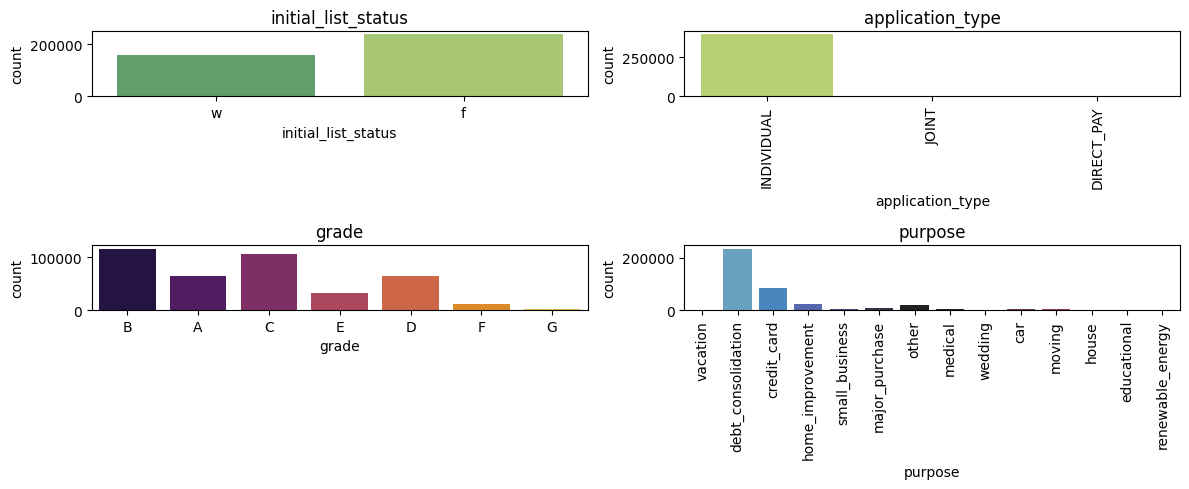

In [20]:
plt.figure(figsize=(12,5))
plt.subplot(2,2,1)
sns.countplot(data=data,x='initial_list_status',palette='summer')
plt.title('initial_list_status')
plt.subplot(2,2,2)
sns.countplot(data=data,x='application_type',palette='summer_r')
plt.xticks(rotation=90)
plt.title('application_type')
plt.subplot(2,2,3)
sns.countplot(data=data,x='grade',palette='inferno')
plt.title('grade')
plt.subplot(2,2,4)
sns.countplot(data=data,x='purpose',palette='icefire')
plt.xticks(rotation=90)
plt.title('purpose')

plt.tight_layout()
plt.show()

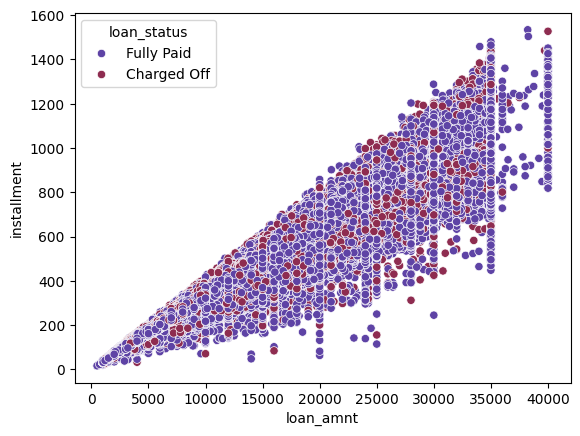

In [21]:
sns.scatterplot(x='loan_amnt', y='installment', data=data,palette='twilight',hue='loan_status')
plt.show()

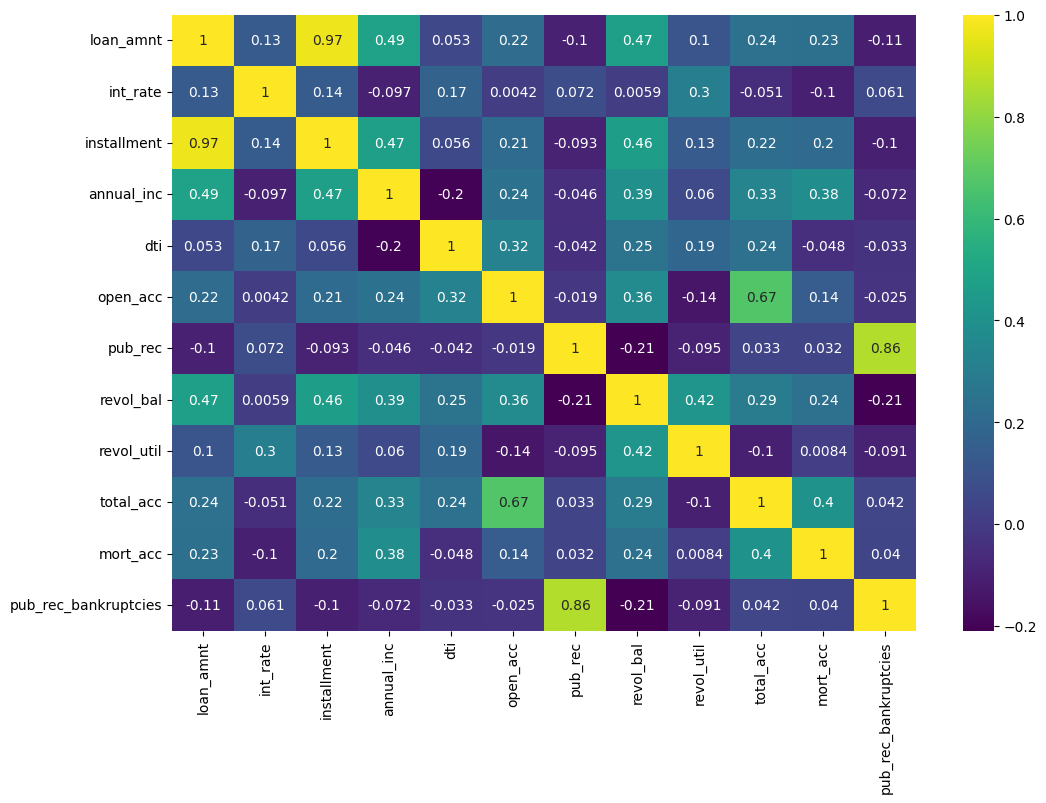

In [22]:
##Correlation Matrix
plt.figure(figsize=(12, 8))
sns.heatmap(data[numerical_cols].corr(method='spearman'), annot=True, cmap='viridis')
plt.show()

In [23]:
data['emp_title'].value_counts().sort_values(ascending=False)

emp_title
Teacher                         4389
Manager                         4250
Registered Nurse                1856
RN                              1846
Supervisor                      1830
                                ... 
NEW YORK HOSPITAL OF QUEENS        1
Famous Dave's of America           1
Sig LLC                            1
HARVEST PARTNERS, LP               1
Gracon Services, Inc               1
Name: count, Length: 173105, dtype: int64

In [24]:
# Correlation between loan amt,installment is high
# Correlation between pub_rec and pub_rec_banlruptcies is high
data['emp_length'].value_counts()/data.shape[0]*100

emp_length
10+ years    31.826124
2 years       9.046537
< 1 year      8.010757
3 years       7.995606
5 years       6.690150
1 year        6.535363
4 years       6.048027
6 years       5.262480
7 years       5.256925
8 years       4.840037
9 years       3.866879
Name: count, dtype: float64

#Observation 
1. Teachers,Managers are the profession which take most loans.
2. As loan amount increases, so does its installment so its highly correlated.
3. Most application type is INDIVIDUAL.
4. Debt_consolidation i.e. 59.2% and then credit_card i.e. 21% is the biggest purpose for loan.
5. People having work experience greater than 10+ years are biggest loan takers.


In [25]:
type(data['mort_acc'])

pandas.core.series.Series

##### Data Preprocessing

In [140]:
df=data.copy()

In [141]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [28]:
# df['loan_status'].value_counts()

In [142]:
df

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


##### Mapping of target variable

In [143]:
#Mapping of target variable -
df['loan_status'] = df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

#### Check for duplicates

In [144]:
df.duplicated().sum()

0

No duplicates is present in the dataset

#### Data Preprocessing and Feature Engineering

In [145]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [146]:
def employment_to_numeric(employment_str):
    if isinstance(employment_str, str):
        employment_str = employment_str.strip()
        if employment_str == '< 1 year':
            return 0  # Special case for less than 1 year
        else:
            return int(''.join(filter(str.isdigit, employment_str)))  # Extract numeric part
    else:
        return np.nan


df['emp_length'] =df['emp_length'].apply(employment_to_numeric)

In [147]:
df['emp_length'].value_counts()

emp_length
10.0    126041
2.0      35827
0.0      31725
3.0      31665
5.0      26495
1.0      25882
4.0      23952
6.0      20841
7.0      20819
8.0      19168
9.0      15314
Name: count, dtype: int64

In [35]:
df.head(1)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"


In [148]:
df["term"].unique()

array([' 36 months', ' 60 months'], dtype=object)

###### Missing Value detection and treatement

In [149]:
# Percentage of missing value in each column
#round((data.isna().sum()/data.shape[0])*100,2)

L = df.shape[0]
missing_col=[]
for col in df.columns:
    p = df[col].isna().sum()/L*100
    if p>0:
        missing_col.append(col)
        print(col, ": ",round(p,2),"%")

emp_title :  5.79 %
emp_length :  4.62 %
title :  0.44 %
revol_util :  0.07 %
mort_acc :  9.54 %
pub_rec_bankruptcies :  0.14 %


In [150]:
for i in missing_col:
    print(i,'    ',df[i].isna().sum(),'   ', df[i].nunique())

emp_title      22927     173105
emp_length      18301     11
title      1756     48816
revol_util      276     1226
mort_acc      37795     33
pub_rec_bankruptcies      535     9


In [151]:
### Since for title ,revol_util,pub_rec_bankruptcies ,missing values are very very less, we will drop it.
df.dropna(subset=['title', 'revol_util','pub_rec_bankruptcies'],inplace=True)

In [152]:
# for emp_title ,we will replace missing value with 'Others'
df['emp_title'] = df['emp_title'].fillna("Other_title")

# for emp_length  ,we will do median imputing and for mort_acc we will fill it with 0
median_impute=df['emp_length'].median()
df['mort_acc'] = df['mort_acc'].fillna(0.0)
df['emp_length'] = df['emp_length'].fillna(value=median_impute)

In [153]:
df[['emp_title','emp_length','mort_acc']].head(5)

,emp_title,emp_length,mort_acc
0,Marketing,10.0,0.0
1,Credit analyst,4.0,3.0
2,Statistician,0.0,0.0
3,Client Advocate,6.0,0.0
4,Destiny Management Inc.,9.0,1.0


In [154]:
df['emp_length'].dtype

dtype('float64')

In [155]:
df.isna().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [44]:
## ALL missing values are treated.

##### Outliers detection and treatment

In [156]:
def check_outliers(num_columns, df):
    # check for outliers
    for col in num_columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3-q1
        outliers = len(df) - len(df[(df[col]>=(q1-1.5*iqr)) & (df[col]<=(q3+1.5*iqr))])
        print(f"{col:20}: {round(outliers*100/len(df), 6)}")
        
check_outliers(numerical_cols, df)

loan_amnt           : 0.046002
int_rate            : 0.944432
installment         : 2.831009
annual_inc          : 4.214109
dti                 : 0.065063
open_acc            : 2.599475
pub_rec             : 14.586087
revol_bal           : 5.360084
revol_util          : 0.002796
total_acc           : 2.147846
mort_acc            : 1.732306
pub_rec_bankruptcies: 11.402822


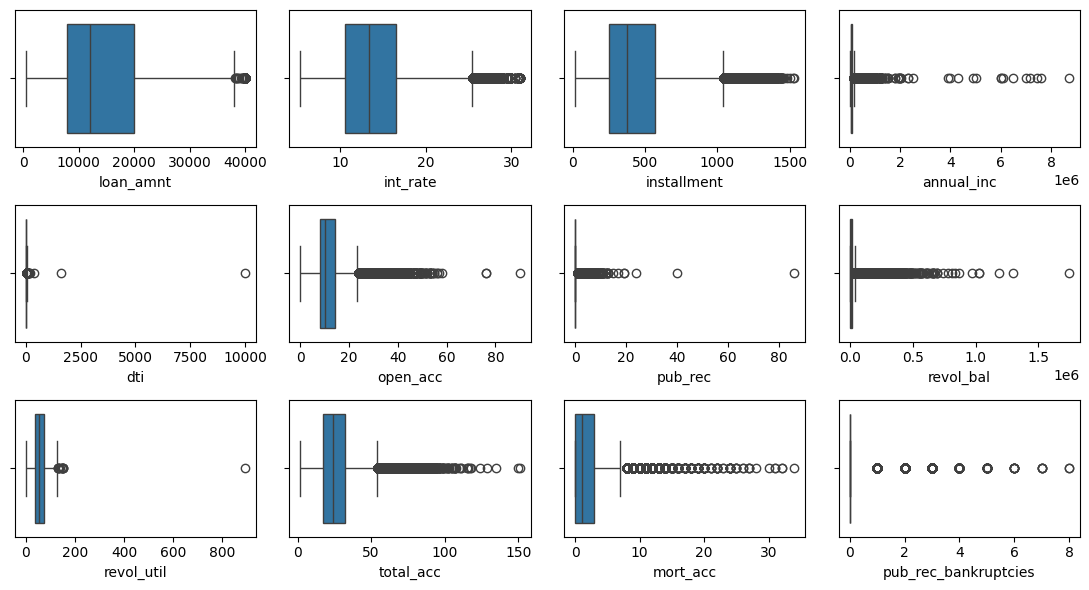

In [46]:
fig,axis=plt.subplots(nrows = 3,ncols = 4,figsize = (11,6))
for i in range(3):
    for j in range(4):
        col=numerical_cols[4*i+j]
        plt.xlabel(col)
        sns.boxplot(x=data[col],ax=axis[i,j])
plt.tight_layout()
plt.show()
#[4*i+j]

In [157]:
# #capping outliers
def treat_outliers(num_columns, df):
    for col in num_columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3-q1
        upper_limit = q3 + 1.5 * iqr
        lower_limit = q1 - 1.5 * iqr
        df[col] = np.where(df[col] > upper_limit,upper_limit,np.where(df[col] < lower_limit,lower_limit,df[col]))

treat_outliers(numerical_cols, df)


In [158]:
def check_outliers(num_columns, df):
    # check for outliers
    for col in num_columns:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        iqr = q3-q1
        outliers = len(df) - len(df[(df[col]>=(q1-1.5*iqr)) & (df[col]<=(q3+1.5*iqr))])
        print(f"{col:20}: {round(outliers*100/len(df), 6)}")
        
check_outliers(numerical_cols, df)

loan_amnt           : 0.0
int_rate            : 0.0
installment         : 0.0
annual_inc          : 0.0
dti                 : 0.0
open_acc            : 0.0
pub_rec             : 0.0
revol_bal           : 0.0
revol_util          : 0.0
total_acc           : 0.0
mort_acc            : 0.0
pub_rec_bankruptcies: 0.0


In [49]:
df.head(3)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10.0,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4.0,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,0.0,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"


In [159]:
def city_extract(address):
    city_pattern = r'(.+), [A-Z]{2}' 
    # Extract city
    city_match = re.search(city_pattern, address)
    city = city_match.group(1).strip() if city_match else None
    return city
df['city']=df['address'].apply(city_extract)

In [160]:
def pincode_extract(address):
    pincode_pattern = r'[0-9]{5}$'
    # Extract pincode
    pincode_match = re.search(pincode_pattern, address)
    pincode = pincode_match.group() if pincode_match else None
    return pincode

df['pincode']=df['address'].apply(pincode_extract)

In [161]:
df['city'].fillna(value='Others',inplace=True)


In [53]:
print("Unique city : ",df['city'].nunique())
print("Unique pincode : ", df['pincode'].nunique())

Unique city :  67354
Unique pincode :  10


In [54]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address', 'city', 'pincode'],
      dtype='object')

In [162]:
df['issue_d_year'] = pd.to_datetime(df['issue_d']).dt.year
df['issue_d_month'] = pd.to_datetime(df['issue_d']).dt.month

df['earliest_cr_line_year'] = pd.to_datetime(df['earliest_cr_line']).dt.year
df['earliest_cr_line_month'] = pd.to_datetime(df['earliest_cr_line']).dt.month

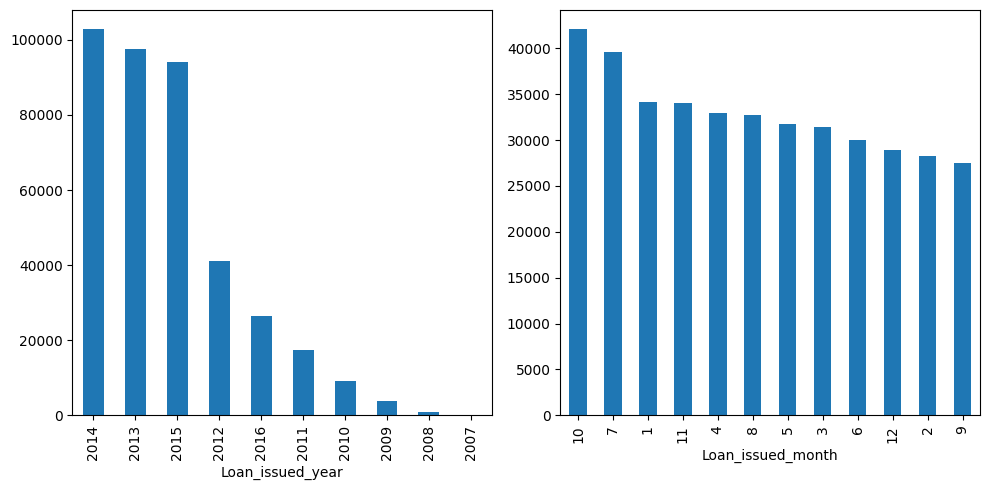

In [56]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['issue_d_year'].value_counts().plot(kind='bar')
plt.xlabel("Loan_issued_year")

plt.subplot(1,2,2)
df['issue_d_month'].value_counts().plot(kind='bar')
plt.xlabel("Loan_issued_month")

plt.tight_layout()
plt.show()

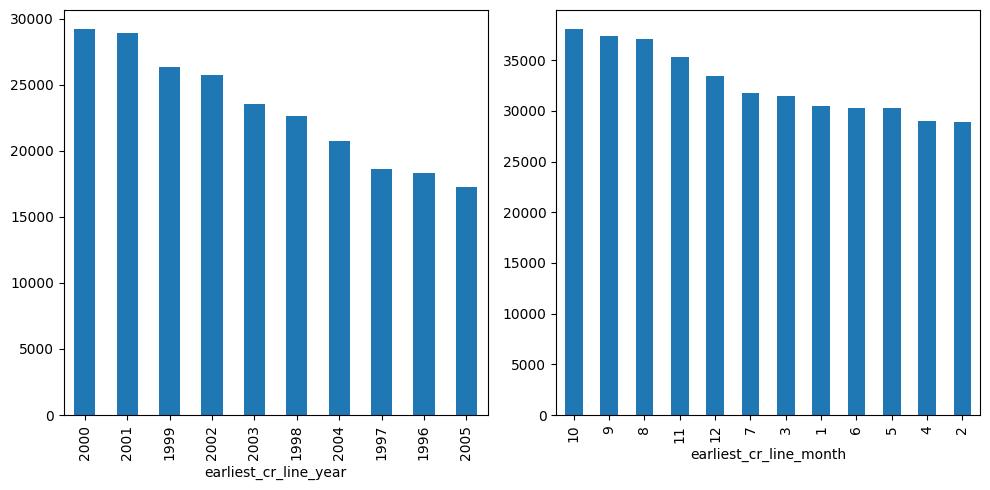

In [57]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
df['earliest_cr_line_year'].value_counts().head(10).plot(kind='bar')
plt.xlabel("earliest_cr_line_year")

plt.subplot(1,2,2)
df['earliest_cr_line_month'].value_counts().plot(kind='bar')
plt.xlabel("earliest_cr_line_month")

plt.tight_layout()
plt.show()

In [163]:
cols_to_drop = ['address', 'issue_d', 'earliest_cr_line']
df.drop(columns=cols_to_drop, axis=1, inplace=True)

##### Encoding

In [164]:
one_hot_cols = ['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status',
                'purpose', 'initial_list_status', 'application_type']
target_encoding_cols = ['emp_title', 'address_pin', 'address_city_code']

In [165]:
# one hot encoding
newdf = pd.get_dummies(df[one_hot_cols], drop_first=True,dtype=int)

In [166]:
df = pd.concat([newdf, df], axis=1)
df.drop(columns=one_hot_cols, axis=1, inplace=True)

In [167]:
# target encoding
df['emp_title'] = df['emp_title'].map(df.groupby('emp_title')['loan_status'].mean())
df['pincode'] = df['pincode'].map(df.groupby('pincode')['loan_status'].mean())
df['city'] = df['city'].map(df.groupby('city')['loan_status'].mean())
df['title']=df['title'].map(df.groupby('title')['loan_status'].mean())

In [168]:
df.head(3)

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,city,pincode,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,0,1,0,0,0,0,0,0,0,0,...,41.8,25.0,0.0,0.0,0.166667,0.193743,2015,1,1990,6
1,0,1,0,0,0,0,0,0,0,0,...,53.3,27.0,3.0,0.0,0.357143,0.000000,2015,1,2004,7
2,0,1,0,0,0,0,0,0,0,0,...,92.2,26.0,0.0,0.0,0.272727,0.000000,2015,1,2007,8


In [169]:
df['loan_status'].value_counts()

loan_status
0    316270
1     77194
Name: count, dtype: int64

##### Target variable 

In [175]:
df1=df.copy(deep=True)

In [176]:
df1.drop(columns=['loan_status'],inplace=True)
y = df['loan_status']

In [186]:
X=df1.copy(deep=True)

In [187]:
X.shape,y.shape

((393464, 84), (393464,))

##### Standarisation

In [192]:
scaler=StandardScaler()
X = scaler.fit_transform(X)

In [195]:
X=pd.DataFrame(X,columns = df1.columns)

In [197]:
X.shape

(393464, 84)

##### Train-Test Split

In [198]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Shape of X_train data :",X_train.shape)
print("Shape of X_test data :",X_test.shape)

Shape of X_train data : (314771, 84)
Shape of X_test data : (78693, 84)


In [200]:
X_train.head(2)

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,city,pincode,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
292571,-0.558074,1.552326,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,-0.165656,-0.203972,...,-0.144536,0.239348,1.707992,0.0,0.835735,-0.003559,0.255242,-0.166261,0.436836,1.526884
254759,-0.558074,-0.644195,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,6.036611,-0.203972,...,0.794106,-0.637940,-0.811336,0.0,-1.195570,-0.753800,-2.483530,1.586563,0.019861,0.653545


#### Model Building

##### Class Imbalance Treatement

In [201]:
y_train.value_counts()/y_train.shape[0]*100

loan_status
0    80.469929
1    19.530071
Name: count, dtype: float64

In [202]:
X_train.shape,y_train.shape

((314771, 84), (314771,))

In [131]:
X_train.head(2)

,0,1,2,3,4,5,6,7,8,9,...,74,75,76,77,78,79,80,81,82,83
292571,-0.558074,1.552326,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,-0.165656,-0.203972,...,-0.144536,0.239348,1.707992,0.0,0.835735,-0.003559,0.255242,-0.166261,0.436836,1.526884
254759,-0.558074,-0.644195,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,6.036611,-0.203972,...,0.794106,-0.637940,-0.811336,0.0,-1.195570,-0.753800,-2.483530,1.586563,0.019861,0.653545


In [203]:
### Highly imbalance dataset
smote = SMOTE(random_state=42)
X_train_smote,y_train_smote = smote.fit_resample(X_train,y_train.ravel())

In [204]:
X_train_smote.head(3)

,term_ 60 months,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,sub_grade_A2,sub_grade_A3,sub_grade_A4,...,revol_util,total_acc,mort_acc,pub_rec_bankruptcies,city,pincode,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,-0.558074,1.552326,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,-0.165656,-0.203972,...,-0.144536,0.239348,1.707992,0.0,0.835735,-0.003559,0.255242,-0.166261,0.436836,1.526884
1,-0.558074,-0.644195,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,6.036611,-0.203972,...,0.794106,-0.637940,-0.811336,0.0,-1.195570,-0.753800,-2.483530,1.586563,0.019861,0.653545
2,-0.558074,1.552326,-0.604313,-0.436802,-0.293711,-0.174654,-0.087948,-0.15733,-0.165656,-0.203972,...,0.822798,-0.023838,-0.811336,0.0,0.077786,-0.009406,-1.798837,0.418014,0.019861,0.071319


In [205]:
X_train_smote.shape,y_train_smote.shape

((506592, 84), (506592,))

In [220]:
# Creating validation data
# Splitting the Training data into training and validation 
X_train1, X_val, y_train1, y_val = train_test_split(X_train_smote, y_train_smote, test_size=0.2, random_state=42)

In [221]:
X_train1.shape, X_val.shape, y_train1.shape, y_val.shape

((405273, 84), (101319, 84), (405273,), (101319,))

###### Multicollinearity and Feature Selection

In [209]:
X_train1.columns

Index(['term_ 60 months', 'grade_B', 'grade_C', 'grade_D', 'grade_E',
       'grade_F', 'grade_G', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4',
       'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3',
       'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2',
       'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1',
       'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5',
       'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4',
       'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3',
       'sub_grade_F4', 'sub_grade_F5', 'sub_grade_G1', 'sub_grade_G2',
       'sub_grade_G3', 'sub_grade_G4', 'sub_grade_G5',
       'home_ownership_MORTGAGE', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'verification_status_Source Verified', 'verification_status_Verified',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 

In [210]:
# Columns for checking VIF
normalize_variables=['loan_amnt','open_acc','int_rate','installment','annual_inc','dti',
                     'revol_bal','revol_util','total_acc', 'earliest_cr_line_month','issue_d_month','city']

In [211]:
vif_columns = normalize_variables
vif = pd.DataFrame()
vif['Features'] = vif_columns
vif['VIF'] = [variance_inflation_factor(X_train1[vif_columns].values, i) for i in range(X_train1[vif_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,loan_amnt,12.56
3,installment,11.80
1,open_acc,2.23
8,total_acc,2.07
6,revol_bal,2.01
4,annual_inc,1.86
7,revol_util,1.53
5,dti,1.46
2,int_rate,1.32
11,city,1.04


In [219]:
#removing column loan_amnt and calculating vif again
new_normalize_variables=['open_acc','int_rate','installment','annual_inc','dti',
                     'revol_bal','revol_util','total_acc', 'earliest_cr_line_month','issue_d_month','city']
new_vif_columns = new_normalize_variables
vif1 = pd.DataFrame()
vif1['Features'] = new_vif_columns
vif1['VIF'] = [variance_inflation_factor(X_train1[new_vif_columns].values, i) for i in range(X_train1[new_vif_columns].shape[1])]
vif1['VIF'] = round(vif1['VIF'], 2)
vif1 = vif1.sort_values(by = "VIF", ascending = False)
vif1

,Features,VIF
0,open_acc,2.22
7,total_acc,2.06
5,revol_bal,1.95
3,annual_inc,1.83
2,installment,1.61
6,revol_util,1.50
4,dti,1.46
1,int_rate,1.28
10,city,1.04
8,earliest_cr_line_month,1.00


In [ ]:
## Dropping loan_amnt has solved multicollinearity.

In [222]:
#dropping column loan_amnt
X_train1 = X_train1.drop(columns = 'loan_amnt', axis = 1)
X_test = X_test.drop(columns = 'loan_amnt', axis = 1)
X_val = X_val.drop(columns = 'loan_amnt', axis = 1)

###### Recursive Feature Elimination (RFE)

In [223]:
clf = LogisticRegression(max_iter=1000)
rfe = RFE(clf, n_features_to_select=25)
loan_model = rfe.fit(X_train1.values, y_train1)

In [225]:
print('-'*50)
print(f'25 Selected Significant Columns are as follow: ')
print('-'*50)
sig_columns = X_train1.columns[loan_model.support_]
for col in sig_columns:
    print(col)

--------------------------------------------------
25 Selected Significant Columns are as follow: 
--------------------------------------------------
term_ 60 months
grade_B
grade_C
grade_D
grade_E
grade_F
grade_G
sub_grade_D1
sub_grade_D5
home_ownership_MORTGAGE
home_ownership_OWN
home_ownership_RENT
purpose_credit_card
purpose_debt_consolidation
purpose_home_improvement
installment
emp_title
title
dti
open_acc
revol_bal
revol_util
total_acc
city
pincode


###### Logistics regression

In [226]:
model=LogisticRegression()
model.fit(X_train1,y_train1)

LogisticRegression()

In [227]:
print('-'*70)
print('Accuracy of Logistic Regression Model is as follow:')
print(f'train_data: \t \t{np.round(model.score(X_train1, y_train1),5)*100} ')
print(f'val_data:\t \t{np.round(model.score(X_val, y_val),5)*100} ')
print(f'test_data:\t \t{np.round(model.score(X_test, y_test),5)*100} ') 
print('-'*70)

----------------------------------------------------------------------
Accuracy of Logistic Regression Model is as follow:
train_data: 	 	92.9 
val_data:	 	92.94 
test_data:	 	92.861 
----------------------------------------------------------------------


###### HyperParameter tuning

In [228]:
train_scores = []
val_scores = []
for la in np.arange(0.01, 5000.0, 100): # range of values of Lambda
  lr = make_pipeline(LogisticRegression(C=1/la))
  lr.fit(X_train1, y_train1)
  train_score = accuracy_score(y_train1, lr.predict(X_train1)) 
  val_score = accuracy_score(y_val, lr.predict(X_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

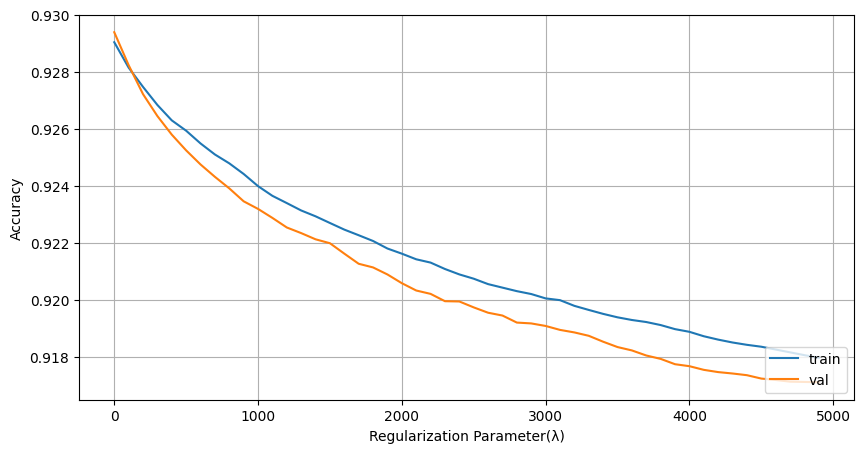

In [229]:
plt.figure(figsize=(10,5))
plt.plot(list(np.arange(0.01, 5000.0, 100)), train_scores, label="train")
plt.plot(list(np.arange(0.01, 5000.0, 100)), val_scores, label="val")
plt.legend(loc='lower right')

plt.xlabel("Regularization Parameter(λ)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

###### Confusion Matrix

In [230]:
y_pred = model.predict(X_test)
conf_mat = confusion_matrix(y_test, y_pred)
print(conf_mat)

[[58782  4192]
 [ 1426 14293]]


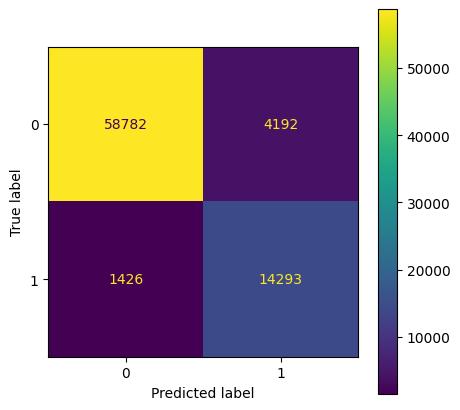

In [231]:
fig, ax = plt.subplots(figsize=(5,5))
ConfusionMatrixDisplay(conf_mat).plot(ax = ax)

In [232]:
#### Classification Report
print('-'*70)
print('Classification Report of Logistics-Regression Model')
print('-'*70)
print(classification_report(y_test,y_pred))
print('-'*70)

----------------------------------------------------------------------
Classification Report of Logistics-Regression Model
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.93      0.95     62974
           1       0.77      0.91      0.84     15719

    accuracy                           0.93     78693
   macro avg       0.87      0.92      0.90     78693
weighted avg       0.94      0.93      0.93     78693

----------------------------------------------------------------------


In [233]:
print("Precision Score is : ",precision_score(y_test, y_pred))
print("Recall Score is : ",recall_score(y_test, y_pred))
print("F1-Score is : ",f1_score(y_test, y_pred))

Precision Score is :  0.7732215309710576
Recall Score is :  0.9092817609262676
F1-Score is :  0.8357502046544264


###### ROC-AUC Curve

In [234]:
probability = model.predict_proba(X_test)
probabilites = probability[:,1]
fpr, tpr, thr = roc_curve(y_test,probabilites)

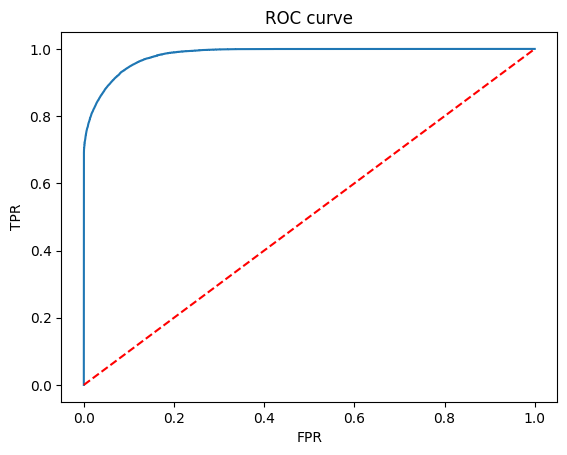

In [235]:
plt.plot(fpr,tpr)

plt.plot(fpr,fpr,'--',color='red' )
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [236]:
print("Roc_Auc Score is : ",roc_auc_score(y_test,probabilites))

Roc_Auc Score is :  0.9836933400443666


###### Precision-Recall curve

In [237]:
precision, recall, thr = precision_recall_curve(y_test, probabilites)

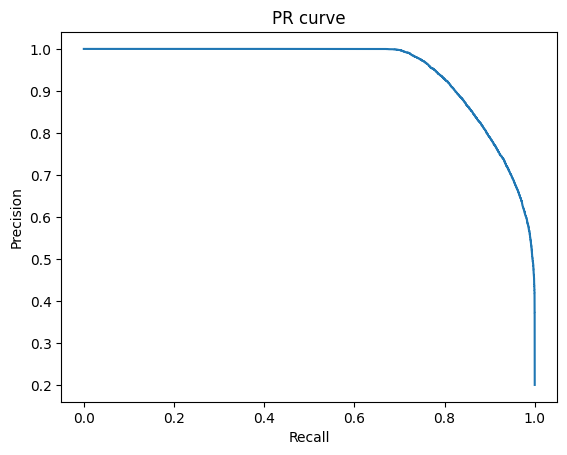

In [238]:
plt.plot(recall, precision)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

In [239]:
print("Auc Score is : ",auc(recall, precision))

Auc Score is :  0.9507508804839881


# Observation:
ROC-AUC Score = 0.9836964494860898
AUC Score = 0.9507559056884218

# QUESTIONAIRE

Questionnaire (Answers should present in the text editor along
with insights):
1. What percentage of customers have fully paid their Loan Amount?
=> 80%
2. Comment about the correlation between Loan Amount and Installment features.
=> very high i.e. 0.97
3. The majority of people have home ownership as Mortgage.
4. People with grades ‘A’ are more likely to fully pay their loan. (T/F)
=> True followed by B
5. Name the top 2 afforded job titles.
=> Correctional Sgt. with average annual income of 8706582 and Interim Director of Case Management with avg income of 7600000.
6. Thinking from a bank's perspective, which metric should our primary focus be on..
=> F1 should be perfect metrics since for bank both racll and precision is important. and F1 is a good balance between both of them. Also area under precision-recall can also be looked upon ,since these are highly imbalanced data.

key in analytics.
ROC AUC = 0.98
Precision = 77 %
Recall = 91 %
F1 -score = 84 %

7. How does the gap in precision and recall affect the bank?
=> Precision measures the accuracy of positive predictions, indicating the proportion of correctly approved loans among all approved loans.
Recall measures the ability of the system to identify all relevant cases, indicating the proportion of correctly approved loans among all actual positive cases. While recall gives percentage of person predicted who actually be given a loan out of total person who has been granted loan.
A gap between precision and recall suggests an imbalance in the system's ability to accurately approve loans (precision) and its coverage of all deserving applicants (recall).A high precision and low recall could mean that the system approves loans accurately but misses out on approving deserving applicants, possibly leading to lost opportunities and customer dissatisfaction. Conversely, a high recall and low precision could result in approving many loans, including risky ones, leading to higher default rates and financial losses for the bank.

8. Which were the features that heavily affected the outcome?
=> We can see from RFC that term,grade,sub_grade,home_ownership,purpose,installment,title,dti,open_acc,revol_bal,total_acc,city,pincode are among top features.

9. Will the results be affected by geographical location? (Yes/No)
=>Yes. Pincode (derived from address) has significant impact on the outcome.

### RECOMENDATION AND INSIGHTS

1.Around 80.26% of customers have fully paid their Loan Amount. The defaulters are ~ 20%. From Personal loan business perspective this ratio is high. These 20% will contribute in NPAs of LoanTap. To reduce the risk of NPAs,

2.LoanTap should add slightly stringent rules to bring down this ratio to 5% to 6%.

3.LoanTap should provide loans at slightly higher rate than other Banks. This will offset the risks of defaulters and maintain the profitability of the business.
4.Overall Statistics of the Model:
Accuracy = 93 %
Precision = 77 %
Recall = 91 %
F1 -score = 84 %

5.Model created has high values for accuracy, precision, recall & f1-score. This means, this model is a good classifier. Overall, it has good prediction capability in identifying right customers (which can be easily converted).
However this model has slightly low capability on correctly identifying defaulters. Overall data has 20% defaulters, model is able to predict 10% of them correctly.Using this model, LoanTap can easily reduce the ration of defaulters in their portfolio.

6.Features which have significant impact on outcome are as follow:term,grade,sub_grade,home_ownership,purpose,installment,title,dti,open_acc,revol_bal,total_acc,city,pincode

7. Pincode is significant feature.LoanTap can increase their market presence in pincodes with Positive Coefficient.
LoanTap should minimize their marketing/sales expenditure in pincodes with Negative Coefficient.
Pincode based market segmentation should be included at strategic levels.

8. Smaller loan replayement terms should be tried since having 60 months term has strong negative correlation.

9.Application_type JOINT has positive Coefficient. Which means LoanTap can promote persons to apply for joint loan. Because of this, chances of default will reduce.

10. Teachers,Managers are the profession which take most loans.

11.Most application type is INDIVIDUAL.

12.Debt_consolidation i.e. 59.2% and then credit_card i.e. 21% is the biggest purpose for loan.

13.People having work experience greater than 10+ years are biggest loan takers..